In [124]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
import numpy as np

In [126]:
raw_text = open('cien sonetos de amor.txt').readlines()

In [127]:
raw_text[:20]

['Soneto I \n',
 '\n',
 'Matilde, nombre de planta o piedra o vino, \n',
 'de lo que nace de la tierra y dura, \n',
 'palabra en cuyo crecimiento amanece, \n',
 'en cuyo estío estalla la luz de los limones. \n',
 '\n',
 'En ese nombre corren navíos de madera \n',
 'rodeados por enjambres de fuego azul marino, \n',
 'y esas letras son el agua de un río \n',
 'que desemboca en mi corazón calcinado. \n',
 '\n',
 '¡Oh nombre descubierto bajo una enredadera \n',
 'como la puerta de un túnel desconocido \n',
 'que comunica con la fragancia del mundo! \n',
 '\n',
 'Oh invádeme con tu boca abrasadora, \n',
 'indágame, si quieres, con tus ojos nocturnos, \n',
 'pero en tu nombre déjame navegar y dormir.\n',
 '\n']

In [128]:
def replace_chars(line):
    return line.replace(' \n', '\n') \
        .replace('    ', ' ') \
        .replace('   ', ' ') \
        .replace('  ', ' ') \
        .replace('(', 'char_open_parent') \
        .replace(')', 'char_close_parent') \
        .replace('\n', ' char_new_line ') \
        .replace('.', ' char_dot ') \
        .replace(',', ' char_comma ') \
        .replace('¡', ' char_exclamation_open ') \
        .replace('!', ' char_exclamation_close ') \
        .replace('¿', ' char_question_open ') \
        .replace('?', ' char_question_close ') \
        .replace(':', ' char_dos_puntos ') 
      #.replace('«', '"')
      #.replace('»', '"')
      #.replace('-', 'char_guion_medio')
      #.replace('"', ' char_comillas ')
                             

In [129]:
def clean_raw_text_and_verify(raw_text):
    cont_elem = len(raw_text)
    i = 0
    raw_text_no_cr = []
    versos_count = 0
    soneto_nro = 0
    estructura = []
    while (i<cont_elem):
        if raw_text[i][:7] == 'Soneto ':
            # Es el titulo
            i += 1
            soneto_nro += 1
            # Saco enters despues de Soneto XX
            while raw_text[i]=='\n':
                i += 1
            raw_text_no_cr.append(' START_SONETO ')

        if raw_text[i]=='\n':
            # Fin estrofa
            raw_text_no_cr.append(replace_chars('\n'))
            estructura.append(versos_count)
            versos_count=0
            if len(estructura)==4:
                # Fin soneto
                if estructura!=[4, 4, 3, 3]:
                    print('Soneto', soneto_nro)
                    print('estructura', estructura)
                estructura = []
                raw_text_no_cr.append(' END_SONETO ')
                # Saco todos los enters antes de Soneto XX
                while raw_text[i]=='\n':
                    i += 1
            else: i += 1
                #print(raw_text[i])
        elif raw_text[i][:7] != 'Soneto ':
            # Es un verso
            versos_count = versos_count + 1
            raw_text_no_cr.append(replace_chars(raw_text[i]))
            i += 1
    if (raw_text_no_cr[-1]!=' END_SONETO '):
        raw_text_no_cr.append(' END_SONETO ')
    return raw_text_no_cr

In [130]:
raw_text_no_cr = clean_raw_text_and_verify(raw_text)

In [131]:
# Junto todo el texto para meterlo en el vectorizer
all_text = ''.join(raw_text_no_cr).lower()

In [132]:
import re
def find_uncoded_stuff(all_text):
    separators = re.compile('(?u)\\b\\w+\\b').split(all_text)
    for s in separators:
        for c in s:
            if c!=' ':
                print('char=',c, 'code=',ord(c))

In [133]:
find_uncoded_stuff(all_text)

In [134]:
text_array_as_words = re.findall('(?u)\\b\\w+\\b', all_text)

In [137]:
text_array_as_words[:100]

['start_soneto',
 'matilde',
 'char_comma',
 'nombre',
 'de',
 'planta',
 'o',
 'piedra',
 'o',
 'vino',
 'char_comma',
 'char_new_line',
 'de',
 'lo',
 'que',
 'nace',
 'de',
 'la',
 'tierra',
 'y',
 'dura',
 'char_comma',
 'char_new_line',
 'palabra',
 'en',
 'cuyo',
 'crecimiento',
 'amanece',
 'char_comma',
 'char_new_line',
 'en',
 'cuyo',
 'estío',
 'estalla',
 'la',
 'luz',
 'de',
 'los',
 'limones',
 'char_dot',
 'char_new_line',
 'char_new_line',
 'en',
 'ese',
 'nombre',
 'corren',
 'navíos',
 'de',
 'madera',
 'char_new_line',
 'rodeados',
 'por',
 'enjambres',
 'de',
 'fuego',
 'azul',
 'marino',
 'char_comma',
 'char_new_line',
 'y',
 'esas',
 'letras',
 'son',
 'el',
 'agua',
 'de',
 'un',
 'río',
 'char_new_line',
 'que',
 'desemboca',
 'en',
 'mi',
 'corazón',
 'calcinado',
 'char_dot',
 'char_new_line',
 'char_new_line',
 'char_exclamation_open',
 'oh',
 'nombre',
 'descubierto',
 'bajo',
 'una',
 'enredadera',
 'char_new_line',
 'como',
 'la',
 'puerta',
 'de',
 'un',

In [136]:
from collections import Counter

In [14]:
Counter(text_array_as_words).most_common(100)

[('char_new_line', 1798),
 ('char_comma', 1014),
 ('la', 475),
 ('de', 456),
 ('y', 413),
 ('char_dot', 371),
 ('el', 313),
 ('que', 261),
 ('en', 227),
 ('tu', 166),
 ('del', 165),
 ('las', 134),
 ('a', 132),
 ('por', 130),
 ('con', 120),
 ('no', 120),
 ('los', 117),
 ('como', 117),
 ('start_soneto', 100),
 ('end_soneto', 100),
 ('un', 95),
 ('amor', 93),
 ('char_dos_puntos', 89),
 ('mi', 87),
 ('una', 85),
 ('tus', 82),
 ('te', 82),
 ('se', 70),
 ('su', 69),
 ('sin', 61),
 ('es', 54),
 ('yo', 48),
 ('o', 46),
 ('luz', 46),
 ('tú', 44),
 ('tierra', 39),
 ('agua', 39),
 ('ojos', 38),
 ('me', 37),
 ('mar', 35),
 ('si', 34),
 ('noche', 34),
 ('para', 34),
 ('sus', 34),
 ('hasta', 33),
 ('sólo', 33),
 ('al', 33),
 ('corazón', 32),
 ('eres', 32),
 ('ni', 31),
 ('porque', 31),
 ('cielo', 30),
 ('fuego', 28),
 ('sombra', 28),
 ('amo', 27),
 ('todo', 26),
 ('boca', 25),
 ('sino', 25),
 ('vida', 25),
 ('manos', 25),
 ('oh', 24),
 ('cuando', 24),
 ('vez', 24),
 ('luna', 24),
 ('día', 24),
 ('mi

In [15]:
vocab = list(Counter(text_array_as_words))

In [360]:
len(vocab)/len(text_array_as_words)

0.1826669517496971

In [17]:
# Arrancamos desde 1 para el padding
word_to_index = {word:i+1 for i, word in enumerate(vocab)}
index_to_word = {i+1:word for i, word in enumerate(vocab)}

In [18]:
coded_text = [word_to_index[word] for word in text_array_as_words]

In [19]:
print(coded_text[:50])

[1, 2, 3, 4, 5, 6, 7, 8, 7, 9, 3, 10, 5, 11, 12, 13, 5, 14, 15, 16, 17, 3, 10, 18, 19, 20, 21, 22, 3, 10, 19, 20, 23, 24, 14, 25, 5, 26, 27, 28, 10, 10, 19, 29, 4, 30, 31, 5, 32, 10]


In [20]:
len(set(coded_text))

2563

## Primeras pruebas con una ventana de 5 palabras
Todo el texto junto, no separo en poemas

In [110]:
def format_coded_text_in_sentences(coded_text, window = 5, step = 1):
    sentences = []
    next_chars = []
    for i in range(0, len(coded_text) - window, step):
        sentences.append(coded_text[i: i + window])
        next_chars.append(coded_text[i + window])
    return sentences, next_chars

In [111]:
X_train_pre, y_train_pre = format_coded_text_in_sentences(coded_text)

In [112]:
from keras.utils import to_categorical

In [113]:
to_categorical(np.array(y_train_pre)-1).shape

(14026, 2563)

In [114]:
x_train = np.array(X_train_pre)
y_train = to_categorical(np.array(y_train_pre)-1)

In [115]:
y_train[0].shape

(2563,)

In [116]:
X_train_pre[:10]

[[1, 2, 3, 4, 5],
 [2, 3, 4, 5, 6],
 [3, 4, 5, 6, 7],
 [4, 5, 6, 7, 8],
 [5, 6, 7, 8, 7],
 [6, 7, 8, 7, 9],
 [7, 8, 7, 9, 3],
 [8, 7, 9, 3, 10],
 [7, 9, 3, 10, 5],
 [9, 3, 10, 5, 11]]

In [138]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from fnn_helper import PlotLosses

In [118]:
x_train.shape

(14026, 5)

In [119]:
y_train.shape

(14026, 2563)

In [120]:
from models import get_model_1

In [121]:
len(vocab)

2563

In [122]:
model1 = get_model_1(len(vocab))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          164096    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_6 (Dense)              (None, 2563)              258863    
Total params: 488,959
Trainable params: 488,959
Non-trainable params: 0
_________________________________________________________________


In [139]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None)

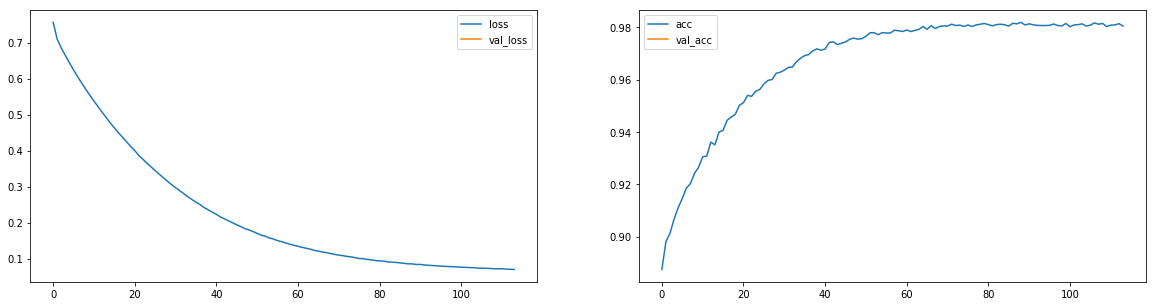

14026/14026 [==============================] - 9s 637us/step - loss: 0.0698 - acc: 0.9804
Epoch 115/400
 2560/14026 [====>.........................] - ETA: 7s - loss: 0.0568 - acc: 0.9840

KeyboardInterrupt: 

In [140]:
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model1.fit(x_train, y_train, batch_size=256, epochs=400, verbose = 1, callbacks=[plot_losses])

In [143]:
# model1.save_weights('model_1-window-5-new.hdf5')

In [163]:
model1.load_weights('model_1-window-5-new.hdf5')

In [336]:
#initial_phrase = ['start_soneto', 'la', 'tarde', 'brilla' ,'en']
#initial_phrase = ['start_soneto', 'el', 'amor', 'es' ,'el']
initial_phrase = ['start_soneto', 'recordarás', 'aquella', 'quebrada', 'caprichosa']

In [337]:
predicted_words = [word_to_index[word] for word in initial_phrase]
for i in range(200):
    pred_word = model1.predict_classes(np.array(predicted_words)[-5:].reshape(1,5))[0]
    pred_word = pred_word + 1
    print(pred_word, end=' ')
    if (word_to_index['end_soneto'] == pred_word):
        break
    predicted_words.append(pred_word)

10 86 194 26 195 196 197 3 10 5 198 19 198 44 199 200 10 61 43 16 201 202 203 5 204 28 10 10 190 26 205 5 14 15 202 10 206 62 3 207 5 208 3 10 209 63 137 3 210 109 3 10 211 136 56 187 28 10 10 190 42 212 12 213 3 10 212 5 214 16 43 61 215 3 10 212 56 54 8 61 216 28 10 10 16 191 217 218 56 219 16 220 202 10 221 222 194 98 223 224 10 16 225 226 11 12 227 228 28 10 10 80 

In [339]:
def words_to_punctuation(decoded_word):
    return decoded_word.replace('char_comma', '\b,').\
              replace('char_dot', '\b.').\
              replace('char_dos_puntos', '\b:').\
              replace('char_new_line', '\n')

In [340]:
print(' ', end='')
for word_idx in predicted_words:
    decoded_word = index_to_word[word_idx]
    if decoded_word!='start_soneto':
        print(words_to_punctuation(decoded_word)
              +
              ' ', end='')

 recordarás aquella quebrada caprichosa 
 a donde los aromas palpitantes treparon, 
 de cuando en cuando un pájaro vestido 
 con agua y lentitud: traje de invierno. 
 
 recordarás los dones de la tierra: 
 irascible fragancia, barro de oro, 
 hierbas del matorral, locas raíces, 
 sortílegas espinas como espadas. 
 
 recordarás el ramo que trajiste, 
 ramo de sombra y agua con silencio, 
 ramo como una piedra con espuma. 
 
 y aquella vez fue como nunca y siempre: 
 vamos allí donde no espera nada 
 y hallamos todo lo que está esperando. 
 
 

In [168]:
model_2 = Sequential()
model_2.add(Embedding(len(vocab)+1, 64, mask_zero = True, name='Embedding'))

In [170]:
model_2.get_layer('Embedding').set_weights(model1.get_layer('embedding_6').get_weights())

In [190]:
all_unique_words_coded = np.linspace(1, len(vocab), len(vocab)).astype(int)

In [300]:
top_100_common_words = []
top_100_common_codes = []
for word in dict(Counter(text_array_as_words).most_common(200)).keys():
    if (word not in ['char_question_open', 'char_question_close', 'char_new_line', 'char_comma', 'char_dot', 'start_soneto', 'end_soneto', 'char_dos_puntos', 'char_exclamation_open', 'char_exclamation_close']):
        top_100_common_words.append(word)
        top_100_common_codes.append(word_to_index[word])

In [301]:
top_100_common_words

['la',
 'de',
 'y',
 'el',
 'que',
 'en',
 'tu',
 'del',
 'las',
 'a',
 'por',
 'con',
 'no',
 'los',
 'como',
 'un',
 'amor',
 'mi',
 'una',
 'tus',
 'te',
 'se',
 'su',
 'sin',
 'es',
 'yo',
 'o',
 'luz',
 'tú',
 'tierra',
 'agua',
 'ojos',
 'me',
 'mar',
 'si',
 'noche',
 'para',
 'sus',
 'hasta',
 'sólo',
 'al',
 'corazón',
 'eres',
 'ni',
 'porque',
 'cielo',
 'fuego',
 'sombra',
 'amo',
 'todo',
 'boca',
 'sino',
 'vida',
 'manos',
 'oh',
 'cuando',
 'vez',
 'luna',
 'día',
 'mis',
 'donde',
 'tiempo',
 'así',
 'entre',
 'sol',
 'pan',
 'sobre',
 'dos',
 'lo',
 'mí',
 'sangre',
 'pero',
 'desde',
 'ser',
 'tal',
 'quiero',
 'sueño',
 'voz',
 'arena',
 'más',
 'nos',
 'piedra',
 'mundo',
 'allí',
 'trigo',
 'nadie',
 'sola',
 'hacia',
 'casa',
 'este',
 'ya',
 'esta',
 'río',
 'beso',
 'mío',
 'silencio',
 'eso',
 'bienamada',
 'frío',
 'viento',
 'azul',
 'raíces',
 'otoño',
 'flor',
 'fue',
 'aire',
 'besos',
 'ola',
 'sal',
 'miel',
 'cabellera',
 'mano',
 'ti',
 'sur',
 'vino'

In [302]:
x_train[0]
embedded_words = model_2.predict(top_100_common_codes).reshape(len(top_100_common_words), 64)

In [303]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(embedded_words)
X_embedded.shape

(190, 2)

In [304]:
from matplotlib import pyplot as plt

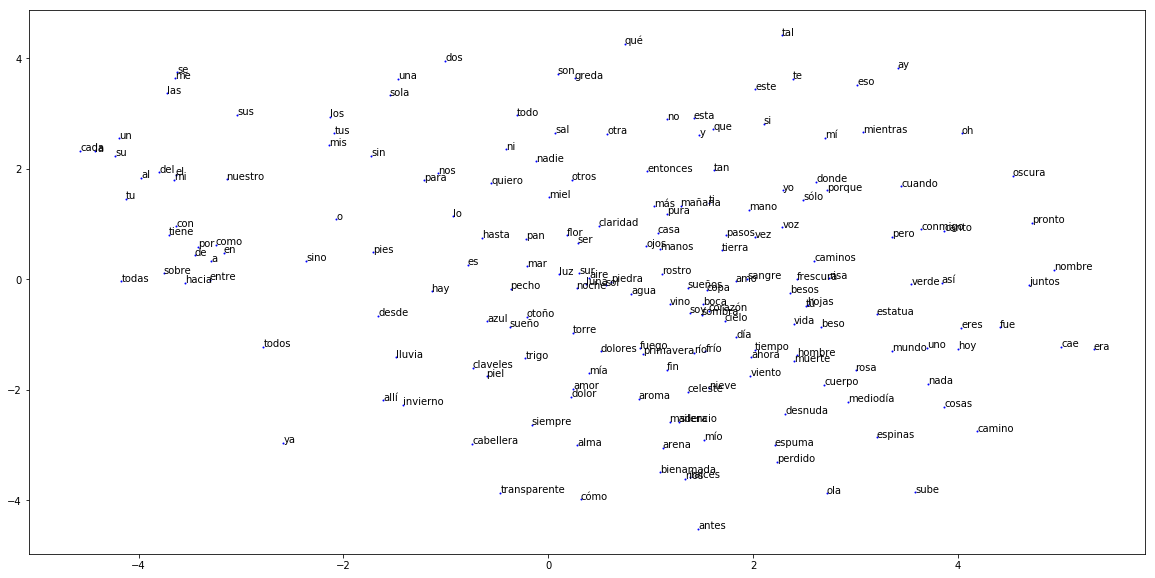

In [305]:
plt.figure(figsize=(20,10))
for i, point in enumerate(X_embedded):
    plt.scatter(point[0], point[1], c='b', s=1)
    plt.text(point[0], point[1], str(top_100_common_words[i]))
plt.show()

In [309]:
from models import get_model_1_statefull

In [312]:
model1s = get_model_1_statefull(len(vocab))

In [328]:
model1s.load_weights('model_1-window-5-new.hdf5')

In [355]:
def predict_list(input_data = ['start_soneto', 'recordarás', 'aquella', 'quebrada', 'caprichosa']):
    model1s.reset_states()
    for word in input_data:
        probs = model1s.predict(np.array(word_to_index[word]).reshape(1,1))[0]
        idx = np.argmax(probs)
        print(word, '->', index_to_word[idx+1], '-> p =', probs[idx])
predict_list()

start_soneto -> cosas -> p = 0.00654018
recordarás -> char_comma -> p = 0.638043
aquella -> del -> p = 0.225794
quebrada -> con -> p = 0.62641
caprichosa -> char_new_line -> p = 0.999568


In [356]:
predict_list(['start_soneto', 'el', 'amor', 'es' ,'el'])

start_soneto -> cosas -> p = 0.00654018
el -> amor -> p = 0.164128
amor -> que -> p = 0.452712
es -> como -> p = 0.871238
el -> mar -> p = 0.452396


In [341]:
model1s.reset_states()
word = 'start_soneto'
probs = model1s.predict(np.array(word_to_index[word]).reshape(1,1))[0]
for i in range(10):
    idx = np.argmax(probs)
    pred_word = index_to_word[idx+1]
    print(words_to_punctuation(word), '->', pred_word, '-> p =', probs[idx])
    word = pred_word
    probs = model1s.predict(np.array(word_to_index[word]).reshape(1,1))[0]

start_soneto -> cosas -> p = 0.00654018
cosas -> char_comma -> p = 0.99968
, -> amor -> p = 0.55777
amor -> char_comma -> p = 0.911444
, -> char_new_line -> p = 0.170079

 -> de -> p = 0.531506
de -> luna -> p = 0.139134
luna -> char_dos_puntos -> p = 0.420289
: -> char_new_line -> p = 0.92579

 -> por -> p = 0.168684


In [359]:
predict_list()
#model1s.reset_states()
word = 'start_soneto'
probs = model1s.predict(np.array(word_to_index[word]).reshape(1,1))[0]
idx = np.argmax(probs)
pred_word = index_to_word[idx+1]
for i in range(100):
    word = pred_word
    if word=='end_soneto':
        break
    probs = model1s.predict(np.array(word_to_index[word]).reshape(1,1))[0]
    idx = np.argmax(probs)
    print(words_to_punctuation(word), end=' ')
    pred_word = index_to_word[idx+1]

start_soneto -> cosas -> p = 0.00654018
recordarás -> char_comma -> p = 0.638043
aquella -> del -> p = 0.225794
quebrada -> con -> p = 0.62641
caprichosa -> char_new_line -> p = 0.999568
la escoba que no de no se hojas y en en en en en en la luz y no tú en la no y en el agua de el agua de no se ausencia de tus ojos y tú y tú en el mundo y no sólo te tu signo y no sólo te no te no y tú y tú y no sólo te amo y no sólo te amo y no sólo te amo y no sólo te amo el fuego y no sólo tú de tu ausencia y no sólo tú y tú y tú y tú 

In [ ]:
pred_word_idx = np.argsort(probs)[0][::-1] + 1
[index_to_word[idx] for idx in pred_word_idx[:3]]

In [ ]:
model1.save_weights('model_1-window-10.hdf5')

In [ ]:
from models import get_model_1

In [ ]:
model_1 = get_model_1(len(set(coded_words)))

In [ ]:
model.summary()

# Soneto por soneto

In [141]:
words_by_soneto = []
accum = []
for word in words:
    if word != 'END_SONETO':
        accum.append(word)
    else:
        words_by_soneto.append(accum)
        accum = []

NameError: name 'words' is not defined

In [ ]:
sonetos_word_frec = []
for soneto in words_by_soneto:
    sonetos_word_frec.append(len(soneto))

In [ ]:
# Cantidad de palabras de sonetos (max y min)
max(sonetos_word_frec), min(sonetos_word_frec)

In [ ]:
vectorizer.vocabulary_['matilde']+1

In [ ]:
# Sonetos codificados (Recordar que se le suma 1 por el tema del masking)
coded_sonetos = []
for soneto in words_by_soneto:
    coded_sonetos.append([vectorizer.vocabulary_[word.lower()]+1 for word in soneto])

In [ ]:
def window_transform_codes_padding_mode(codes):
    len_out = len(codes)
    
    #output_start[-1] = text[:1]
    #output_start[len_out-1:len_out-2] = text[0:1]
    X = []
    y = []
    for i in range(len_out):
        #X.append()
        output_start = [0]*(len_out-1)
        output_start[len_out-i-1:len_out] = codes[0:i]
        X.append(output_start)
        y.append(codes[i])
    return X, y

In [ ]:
max_length = max(sonetos_word_frec)
X_train = np.array([]).reshape(-1, max_length)
y_train = []
for coded_soneto in coded_sonetos:
    X_son_train, y_son_train = window_transform_codes_padding_mode(coded_soneto)
    X_son_train = np.array(X_son_train)
    padding = np.zeros((X_son_train.shape[0], max_length - X_son_train.shape[1]))
    X_son_train = np.hstack([padding,X_son_train ])
    X_train = np.vstack([X_train, X_son_train]).astype(int)
    y_train = y_train + y_son_train
y_train = np.array(y_train)   

In [ ]:
X_train.shape, y_train.shape

In [ ]:
y_train_cat = to_categorical(y_train)

In [ ]:
y_train_cat.shape

In [ ]:
idx = 1
print(np.argmax(y_train_cat[idx]), y_train[idx])
X_train[idx+1]

In [ ]:
from models import get_model_4, get_model_4_statefull

In [ ]:
from fnn_helper import PlotLosses
model4 = get_model_4(y_train_cat.shape[1])
model4.summary()

In [ ]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None)
model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model4.fit(X_train, y_train_cat, batch_size=256, epochs=400, verbose = 1, callbacks=[plot_losses])

In [ ]:
model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model4.evaluate(X_train, y_train_cat)

In [ ]:
# model4.save_weights('model4-1.hdf5')

In [ ]:
vectorizer.get_feature_names()[2202-1]

In [ ]:
index = 10
to_predict = X_train[0:index]
prediction = model4.predict(to_predict)
for i,words in enumerate(to_predict):
    if (sum(words)==0):
        print('pad',end=' ')
    else:
        for c in words:
            if c!= 0:
                #print(c)
                print(vectorizer.get_feature_names()[c-1], end=' ')
            #print(vectorizer.get_feature_names()[np.argmax(word)+1])
            #print(np.argmax(word))
            #print(word)
    print('-> ', end='')
    first = prediction[i]
    print(np.argmax(first), np.max(first), vectorizer.get_feature_names()[np.argmax(first)-1])
    print()


In [ ]:
model4s = get_model_4_statefull(y_train_cat.shape[1])

In [ ]:
model4s.load_weights('model4-1.hdf5')

In [ ]:
X_train[-1][61:62]

In [ ]:
model4s.reset_states()
pred = model4s.predict(X_train[-1][61:62])

In [ ]:
np.argmax(pred), np.max(pred)